In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [101]:
data= pd.read_excel('D:\Downloads\Train_dataset.xlsx')

In [102]:
data.head(3)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.13501
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.14788
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.22400


In [103]:
np.shape(data)

(10714, 28)

In [104]:
data.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


In [105]:
data_cat= data.select_dtypes(include='object')
data_cat.describe()

,Region,Gender,Designation,Name,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
count,10714,10714,10714,10694,10714,9967,10711,10488,10714,10617
unique,5,2,2,6304,2,9,3,4,4,4
top,Chennai,Female,Mrs,pooja,YES,Legal,Public,Hypertension,<400,Normal
freq,2581,5423,5423,122,8481,1174,3588,2642,2702,2681


In [106]:
data_test= pd.read_excel('D:\Downloads\Test_dataset.xlsx')

In [109]:
data_test_cat= data_test.select_dtypes(include='object')
data_test_dis= data_test.select_dtypes(exclude='object')

In [110]:
comb=[data,data_test]
comb_dis= [data_dis,data_test_dis]
comb_cat= [data_cat,data_test_cat]
for datai in comb_cat:
    datai.drop(['Designation','Name'],axis=1,inplace=True)
for datai in comb_dis:
    datai.drop(['people_ID','cases/1M'],axis=1,inplace=True)

D:\Python\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
data_test_cat

,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,Delhi,Female,YES,Driver,Public,Diabetes,<200,Stage-01
1,Delhi,Male,YES,Legal,Walk,Diabetes,<200,Stage-01
2,Delhi,Female,YES,Sales,Car,Diabetes,<100,Stage-02
3,Delhi,Female,YES,Sales,Car,None,<300,Elevated
4,Delhi,Female,YES,Business,Car,Diabetes,<200,Stage-01
...,...,...,...,...,...,...,...,...
14493,Thiruvananthapuram,Male,YES,Cleaner,Walk,Coronary Heart Disease,<400,Normal
14494,Thiruvananthapuram,Female,YES,Clerk,Car,None,<300,Elevated
14495,Thiruvananthapuram,Male,YES,Business,Public,None,<300,Elevated
14496,Thiruvananthapuram,Female,YES,Driver,Car,Coronary Heart Disease,<200,Stage-01


In [108]:
data_dis= data.select_dtypes(exclude='object')

In [284]:
for i in data_dis.columns:
    k= data_dis[i].corr(data_dis['Infect_Prob']) 
    print (k)

0.22679482240332
0.174993986673568
-0.3312578417788841
0.03839972268284267
0.006887234581313774
0.06672738461887423
0.019354211771197456
0.021304354466427852
-0.0036474543903497205
0.013240424723768223
-0.011367873172882757
-0.00965399399475467
0.009995867624072048
-0.024621429412740526
-0.0014743766594164608
0.9999999999999999


In [285]:
data_dis.corr()

,Children,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
Children,1.000000,0.022231,-0.051008,0.025788,-0.012099,0.024257,0.010003,0.004237,0.004667,-0.006087,-0.019529,0.009537,-0.005932,-0.018795,0.004873,0.226795
Deaths/1M,0.022231,1.000000,0.003991,-0.010302,0.029605,0.009392,0.010385,0.000231,0.011776,0.007679,-0.001806,-0.005483,0.012602,0.008088,0.001679,0.174994
Age,-0.051008,0.003991,1.000000,-0.002618,-0.006002,0.011583,0.013847,-0.007124,0.003763,-0.003980,0.002902,0.012601,-0.014370,-0.002901,0.015911,-0.331258
Coma score,0.025788,-0.010302,-0.002618,1.000000,0.003086,-0.014236,0.006820,0.000628,-0.007071,0.007181,-0.005257,0.016351,-0.009284,0.004323,0.001476,0.038400
Diuresis,-0.012099,0.029605,-0.006002,0.003086,1.000000,0.009593,0.003931,-0.009508,-0.007295,0.011152,0.014366,-0.010999,0.023644,-0.006942,-0.016646,0.006887
Platelets,0.024257,0.009392,0.011583,-0.014236,0.009593,1.000000,-0.008051,0.014238,-0.007283,-0.020922,-0.000346,0.010175,0.001908,-0.010824,0.013604,0.066727
HBB,0.010003,0.010385,0.013847,0.006820,0.003931,-0.008051,1.000000,-0.006552,-0.000053,0.004307,0.005611,-0.005468,-0.001509,-0.010859,-0.011888,0.019354
d-dimer,0.004237,0.000231,-0.007124,0.000628,-0.009508,0.014238,-0.006552,1.000000,-0.007661,-0.002185,0.001157,-0.002948,0.016980,0.001513,-0.013268,0.021304
Heart rate,0.004667,0.011776,0.003763,-0.007071,-0.007295,-0.007283,-0.000053,-0.007661,1.000000,-0.011730,-0.006261,-0.010150,0.009506,-0.000490,0.015347,-0.003647
HDL cholesterol,-0.006087,0.007679,-0.003980,0.007181,0.011152,-0.020922,0.004307,-0.002185,-0.011730,1.000000,-0.004816,-0.007721,-0.006328,0.013661,0.014647,0.013240


In [116]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

In [79]:
data_cat['Name'].value_counts()

pooja              122
jyoti               65
poonam              55
deepak              50
suman               49
                  ... 
arun kumar jain      1
himanshu @ nonu      1
partap               1
alaudin              1
noor mhoomad         1
Name: Name, Length: 6304, dtype: int64

In [80]:
data_cat['Name'].value_counts()[20]

31

In [ ]:
if (data_cat['Name'].value_counts()[i]<50):
    data_cat['Name']

In [130]:
pd.pivot_table(data,index=['Occupation'],values='Infect_Prob')

,Infect_Prob
Occupation,
Business,51.859683
Cleaner,51.740274
Clerk,52.058502
Driver,52.157709
Farmer,50.758001
Legal,54.267999
Manufacturing,51.716016
Researcher,52.172316
Sales,52.320812


In [131]:
data_cat['Occupation'].dropna().mode()

0    Legal
dtype: object

In [132]:
data_cat['Occupation']= data_cat['Occupation'].fillna('Legal')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
data_cat['Mode_transport'].dropna().mode()

0    Public
dtype: object

In [134]:
data_cat['Mode_transport']= data_cat['Mode_transport'].fillna('Public')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
data_cat['comorbidity'].dropna().mode()

0    Hypertension
dtype: object

In [136]:
data_cat['comorbidity']= data_cat['comorbidity'].fillna('Hypertension')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
data_cat['comorbidity'].isnull().sum()

0

In [138]:
data_cat['cardiological pressure'].dropna().mode()

0    Normal
dtype: object

In [139]:
data_cat['cardiological pressure']= data_cat['cardiological pressure'].fillna('Normal')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
data_cat.isnull().sum()

Region                    0
Gender                    0
Married                   0
Occupation                0
Mode_transport            0
comorbidity               0
Pulmonary score           0
cardiological pressure    0
dtype: int64

In [158]:
data_dis.isnull().sum()

Children            311
Deaths/1M             0
Age                   0
Coma score            0
Diuresis            716
Platelets           924
HBB                   0
d-dimer            1114
Heart rate         1114
HDL cholesterol       0
Charlson Index        0
Blood Glucose         0
Insurance          1090
salary                0
FT/month            723
Infect_Prob           0
dtype: int64

In [ ]:
for data_i in comb:
    data_i['Occupation']= data_i['Occupation'].map({'Farmer':0,'Legal':1,'Manufacturing':1,'Bussiness':1,'Cleaner':1,'')

In [141]:
data_test['comorbidity'].dropna().mode()

0    Diabetes
dtype: object

In [146]:
data_test_dis.isnull().sum()

Children           0
Deaths/1M          0
Age                0
Coma score         0
Diuresis           0
Platelets          0
HBB                0
d-dimer            0
Heart rate         0
HDL cholesterol    0
Charlson Index     0
Blood Glucose      0
Insurance          0
salary             0
FT/month           0
dtype: int64

In [143]:
for dat in comb_cat:
    for colu in dat.columns:
        dat[colu]= label_encoder.fit_transform(dat[colu])

D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
data_cat

,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,1,0,1,4,1,2,3,1
1,1,0,1,4,2,1,0,3
2,1,0,0,1,1,3,2,0
3,1,0,1,3,0,0,1,2
4,1,0,0,6,0,1,3,1
...,...,...,...,...,...,...,...,...
10709,0,1,0,0,0,1,3,1
10710,0,1,1,6,0,3,3,1
10711,0,1,1,2,1,1,0,3
10712,0,1,1,5,2,0,2,0


In [148]:
data_dis['HDL cholesterol']= data_dis['HDL cholesterol'].fillna(data_dis['HDL cholesterol'].dropna().median())

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
data_dis['HBB']= data_dis['HBB'].fillna(data_dis['HBB'].dropna().median())

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
data_con= pd.concat([data_dis,data_cat],axis=1)

In [177]:
data_con.corr()

,Children,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,...,FT/month,Infect_Prob,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
Children,1.000000,0.022231,-5.100770e-02,0.025788,-0.012099,0.024257,0.010003,0.004237,0.004667,-0.006087,...,0.004873,0.226795,7.961278e-02,0.008559,-0.079724,-0.031391,0.008677,0.021162,-0.004288,0.004610
Deaths/1M,0.022231,1.000000,3.990623e-03,-0.010302,0.029605,0.009392,0.010385,0.000231,0.011776,0.007679,...,0.001679,0.174994,-6.500988e-01,-0.000102,0.009521,-0.011643,-0.003457,-0.001916,-0.020436,0.007570
Age,-0.051008,0.003991,1.000000e+00,-0.002618,-0.006002,0.011583,0.013847,-0.007124,0.003763,-0.003980,...,0.015911,-0.331258,6.376006e-07,-0.005604,0.705147,-0.028907,-0.008853,0.010581,-0.014287,0.009135
Coma score,0.025788,-0.010302,-2.618229e-03,1.000000,0.003086,-0.014236,0.006820,0.000628,-0.007071,0.007181,...,0.001476,0.038400,3.333097e-02,0.010999,0.001248,-0.006917,-0.009496,0.003256,-0.008191,0.000517
Diuresis,-0.012099,0.029605,-6.002179e-03,0.003086,1.000000,0.009593,0.003931,-0.009508,-0.007295,0.011152,...,-0.016646,0.006887,-3.063009e-02,0.017173,0.007822,0.005361,-0.006269,0.001504,0.000529,-0.001305
Platelets,0.024257,0.009392,1.158297e-02,-0.014236,0.009593,1.000000,-0.008051,0.014238,-0.007283,-0.020922,...,0.013604,0.066727,2.601307e-02,-0.008014,-0.001198,-0.002113,-0.006425,0.000462,0.004033,0.004692
HBB,0.010003,0.010385,1.384714e-02,0.006820,0.003931,-0.008051,1.000000,-0.006552,-0.000053,0.004307,...,-0.011888,0.019354,2.662110e-02,0.004472,0.013627,0.010236,-0.002313,-0.000713,0.001645,0.003567
d-dimer,0.004237,0.000231,-7.123576e-03,0.000628,-0.009508,0.014238,-0.006552,1.000000,-0.007661,-0.002185,...,-0.013268,0.021304,-8.889460e-03,-0.009175,-0.009098,-0.007385,-0.005554,-0.003068,0.009247,-0.002191
Heart rate,0.004667,0.011776,3.763207e-03,-0.007071,-0.007295,-0.007283,-0.000053,-0.007661,1.000000,-0.011730,...,0.015347,-0.003647,-4.103652e-02,0.008411,-0.001422,-0.009455,-0.006493,0.003090,-0.007395,0.001797
HDL cholesterol,-0.006087,0.007679,-3.980278e-03,0.007181,0.011152,-0.020922,0.004307,-0.002185,-0.011730,1.000000,...,0.014647,0.013240,2.679203e-02,0.018223,0.003520,-0.014161,0.011459,-0.006978,-0.000755,0.009474


In [244]:
for i in range(0, 5):
    for j in range(0, 2):
            guess_df = data_con[(data_con['Region'] == i) & \
                                  (data_con['Married'] == j)]['Children'].dropna()


            children_guess = guess_df.median()

for i in range(0, 5):
    for j in range(0, 2):    
        data_con.loc[ (data_con.Children.isnull()) & (data_con.Region == i) & (data_con.Married == j),\
                    'Children'] = children_guess


In [245]:
for i in range(0, 5):
    for j in range(0, 2):
            guess_d = data_con[(data_con['Region'] == i) & \
                                  (data_con['Gender'] == j)]['Diuresis'].dropna()


            Diuresis_guess = guess_d.median()

            
            
for i in range(0, 5):
    for j in range(0, 2):
            data_con.loc[ (data_con.Diuresis.isnull()) & (data_con.Region == i) & (data_con.Gender == j),\
                    'Diuresis'] = Diuresis_guess

In [221]:
for i in range(0, 4):
    for j in range(0, 4):
            guess_di = data_con[(data_con['Pulmonary score'] == i) & \
                                  (data_con['cardiological pressure'] == j)]['FT/month'].dropna()


            FTmonth_guess = guess_di.median()

            
            
for i in range(0, 4):
    for j in range(0, 4):
            data_con.loc[ (data_con['FT/month'].isnull()) & (data_con['Pulmonary score'] == i) & (data_con['cardiological pressure'] == j),\
                    'FT/month'] = FTmonth_guess

In [222]:
for i in range(0, 5):
    for j in range(0, 2):
            guess_ = data_con[(data_con['Region'] == i) & \
                                  (data_con['Gender'] == j)]['Platelets'].dropna()


            Platelets_guess = guess_.median()

            
            
for i in range(0, 5):
    for j in range(0, 2):
            data_con.loc[ (data_con.Platelets.isnull()) & (data_con.Region == i) & (data_con.Gender == j),\
                    'Platelets'] = Platelets_guess

In [246]:
for i in range(0, 5):
    for j in range(0, 2):
            guess_d = data_con[(data_con['Region'] == i) & \
                                  (data_con['Gender'] == j)]['Heart rate'].dropna()


            Heartrate_guess = guess_d.median()

            
            
for i in range(0, 5):
    for j in range(0, 2):
            data_con.loc[ (data_con['Heart rate'].isnull()) & (data_con.Region == i) & (data_con.Gender == j),\
                    'Heart rate'] = Heartrate_guess

In [226]:
for i in range(0, 3):
    for j in range(0, 2):
            guess_dh = data_con[(data_con['Mode_transport'] == i) & \
                                  (data_con['Married'] == j)]['Insurance'].dropna()


            Insurance_guess = guess_dh.median()

            
            
for i in range(0, 3):
    for j in range(0, 2):
            data_con.loc[ (data_con.Insurance.isnull()) & (data_con.Mode_transport == i) & (data_con.Married == j),\
                    'Insurance'] = Insurance_guess

In [227]:
data_con.isnull().sum()

Children                     0
Deaths/1M                    0
Age                          0
Coma score                   0
Diuresis                     0
Platelets                    0
HBB                          0
d-dimer                   1114
Heart rate                   0
HDL cholesterol              0
Charlson Index               0
Blood Glucose                0
Insurance                    0
salary                       0
FT/month                   723
Infect_Prob                  0
Region                       0
Gender                       0
Married                      0
Occupation                   0
Mode_transport               0
comorbidity                  0
Pulmonary score              0
cardiological pressure       0
dtype: int64

In [175]:
data_con['FT/month'].dropna().median()

1.0

In [247]:
data_con['FT/month']= data_con['FT/month'].fillna(1.0)

In [181]:
data_con['Children'].dropna().median()

1.0

In [182]:
data_con['Insurance'].dropna().median()

2600000.0

In [183]:
data_con['Heart rate'].dropna().median()

75.0

In [184]:
data_con['d-dimer'].dropna().median()

276.0

In [185]:
data_con['Diuresis'].dropna().median()

276.0

In [186]:
data_con['Platelets'].dropna().median()

88.0

In [229]:
data_con['d-dimer']= data_con['d-dimer'].fillna(276.0)

In [ ]:
data_con['Heart rate']= data_con['Heart rate'].fillna(75.0)

In [248]:
data_con['Insurance']= data_con['Insurance'].fillna(2600000.0)
data_con['d-dimer']= data_con['d-dimer'].fillna(276.0)
data_con['Platelets']= data_con['Platelets'].fillna(88.0)
data_con['Diuresis']= data_con['Diuresis'].fillna(276.0)

In [190]:
listcol=[]
for i in data_cat.columns:
    lis= i
    listcol.append(lis)

In [191]:
listcol

['Region',
 'Gender',
 'Married',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [192]:
data_dis_up= data_con.drop(listcol,axis=1)

In [194]:
data_con

,Children,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,...,FT/month,Infect_Prob,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,1.0,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,...,2.0,49.135010,1,0,1,4,1,2,3,1
1,2.0,0,64,15,276.0,121.0,56.0,328.0,89.0,68.0,...,1.0,51.147880,1,0,1,4,2,1,0,3
2,1.0,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,...,1.0,73.224000,1,0,0,1,1,3,2,0
3,1.0,0,33,9,410.0,98.0,167.0,275.0,64.0,60.0,...,1.0,48.779225,1,0,1,3,0,0,1,2
4,2.0,0,23,7,390.0,21.0,153.0,331.0,71.0,64.0,...,1.0,87.868800,1,0,0,6,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,2.0,2,20,14,134.0,67.0,24.0,209.0,61.0,56.0,...,0.0,41.981760,0,1,0,0,0,1,3,1
10710,0.0,2,42,4,387.0,102.0,134.0,211.0,65.0,47.0,...,1.0,47.148663,0,1,1,6,0,3,3,1
10711,0.0,2,59,3,177.0,111.0,151.0,296.0,87.0,37.0,...,2.0,47.708533,0,1,1,2,1,1,0,3
10712,1.0,2,49,6,352.0,140.0,110.0,253.0,56.0,70.0,...,1.0,53.803565,0,1,1,5,2,0,2,0


In [271]:
#1st attempt
y= data_con1.Infect_Prob
x= data_con1.drop('Infect_Prob',axis=1)

In [272]:
train_x,valid_x,train_y,valid_y= train_test_split(x,y,train_size=0.8,random_state=10)

In [273]:
from sklearn.linear_model import LinearRegression
linear_regression= LinearRegression()

In [274]:
linear_regression.fit(train_x,train_y)
pred= linear_regression.predict(valid_x)
mae=mean_absolute_error(pred,valid_y)
print(mae)

4.665221438993293


In [254]:
#2nd attempt
for i in data_con.columns:
    if (np.absolute(data_con[i].skew())>1):
        print(i)

Deaths/1M
Infect_Prob
Married


In [255]:
data_con['Deaths/1M']= np.log(data_con['Deaths/1M'])
data_con['Infect_Prob']= np.log(data_con['Infect_Prob'])
data_con['Married']= np.log(data_con['Married'])

D:\Python\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [259]:
data_con['Deaths/1M']= data_dis['Deaths/1M']
data_con['Infect_Prob']= data_dis['Infect_Prob']
data_con['Married']= data_cat['Married']

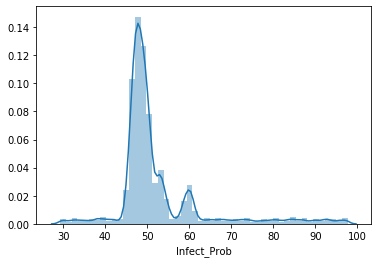

In [261]:
sns.distplot(data_con['Infect_Prob'])

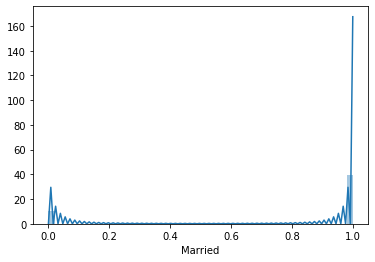

In [262]:
sns.distplot(data_con['Married'])

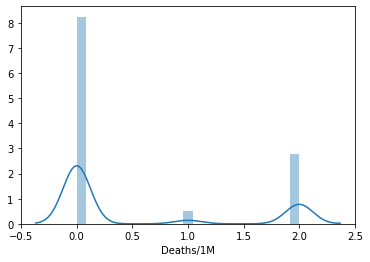

In [263]:
sns.distplot(data_con['Deaths/1M'])

In [264]:
data_con['Infect_Prob']= np.log(data_con['Infect_Prob'])

In [275]:
y2= data_con.Infect_Prob
x2= data_con.drop('Infect_Prob',axis=1)

In [276]:
train_x2,valid_x2,train_y2,valid_y2= train_test_split(x2,y2,train_size=0.8,random_state=10)

In [277]:
linear_regression2= LinearRegression()
linear_regression2.fit(train_x2,train_y2)
pred2= linear_regression2.predict(valid_x2)
mae2=mean_absolute_error(pred2,valid_y2)
print(mae2)

0.08058856195565532


In [269]:
data_con1= data_con.copy()

In [270]:
data_con1['Infect_Prob']= data_dis['Infect_Prob']

In [278]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [279]:
dtr= DecisionTreeRegressor()
knr= KNeighborsRegressor(n_neighbors=3)

In [280]:
dtr.fit(train_x2,train_y2)
knr.fit(train_x2,train_y2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [282]:
pr1=dtr.predict(valid_x2)
pr2=knr.predict(valid_x2)
me1= mean_absolute_error(pr1,valid_y2)
print(me1)
me2= mean_absolute_error(pr2,valid_y2)
print(me2)

0.08321426793280806
0.13615107239557186


In [283]:
dtr0= DecisionTreeRegressor()
dtr0.fit(train_x,train_y)
pr0=dtr0.predict(valid_x)
me0= mean_absolute_error(pr0,valid_y)
print(me0)

4.804959334029398


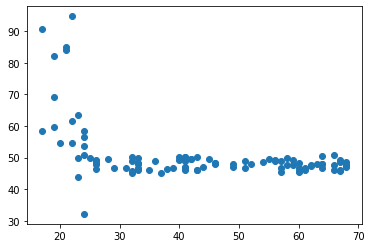

In [301]:
#3rd attempt
plt.scatter(data_con1['Age'][3000:3100],data_con1['Infect_Prob'][3000:3100])

In [302]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [303]:
from xgboost import XGBRegressor

In [309]:
xg= XGBRegressor(n_estimators=500,learning_rate=0.1)

In [310]:
xg.fit(train_x2,train_y2)
pr4=xg.predict(valid_x2)
me4= mean_absolute_error(pr4,valid_y2)
print(me4)

0.07032013249107841


In [319]:
XGB_model= XGBRegressor(n_estimators=500,learning_rate=0.1)
XGB_model.fit(x2,y2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='auto', verbosity=1)

In [318]:
x_test= pd.concat([data_test_dis,data_test_cat],axis=1)

In [320]:
pred_y= XGB_model.predict(x_test)

In [322]:
sub=pd.DataFrame({
        "people_ID": data_test["people_ID"],
        "Infect_Prob": pred_y})

In [323]:
sub.to_csv('D:/Downloads/sub_20th.csv',index=False)

In [324]:
linear_regression3= LinearRegression()
linear_regression3.fit(train_x2,train_y2)
pred5= linear_regression3.predict(valid_x2)

In [325]:
pred5_t= np.exp(pred5)
valid_y2_t= np.exp(valid_y2)

In [326]:
mae5=mean_absolute_error(pred5_t,valid_y2_t)
print(mae5)

4.605406008197006


In [328]:
data_con1['Infect_Prob']

0        49.135010
1        51.147880
2        73.224000
3        48.779225
4        87.868800
           ...    
10709    41.981760
10710    47.148663
10711    47.708533
10712    53.803565
10713    68.342400
Name: Infect_Prob, Length: 10714, dtype: float64

In [329]:
xg2= XGBRegressor(n_estimators=500,learning_rate=0.1)
xg2.fit(train_x2,train_y2)
pr6=xg2.predict(valid_x2)

In [330]:
pr6_t= np.exp(pr6)

In [331]:
mae6=mean_absolute_error(pr6_t,valid_y2_t)
print(mae6)

4.055512982712281


In [332]:
XGB_model2= XGBRegressor(n_estimators=500,learning_rate=0.1)
XGB_model2.fit(x2,y2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='auto', verbosity=1)

In [333]:
pred_y2= XGB_model2.predict(x_test)

In [334]:
pred_y2t= np.exp(pred_y2)

In [335]:
infect_prob= pd.DataFrame({
        "people_ID": data_test["people_ID"],
        "Infect_Prob": pred_y2t})

In [336]:
infect_prob.to_csv('D:/Downloads/infect_prob_20th.csv',index=False)

In [338]:
diuresis= pd.read_csv('D:/Downloads/diruesis.csv')

In [353]:
diuresis_27= pd.read_csv('D:/Downloads/Diruesis27.csv')

In [342]:
diuresis_27th= np.asarray(diuresis_27)
diuresis_27th[1]

array([1783.79788254])

In [355]:
diuresis_27['Diuresis'][2]

1919.0001670399995

In [359]:
x_test['Diuresis'][2]

1919

In [362]:
for i in range(14498):
    x_test['Diuresis'][i]= diuresis_27['Diuresis'][i]

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [392]:
x_test['Diuresis']

0        1692
1        1783
2        1919
3         898
4         998
         ... 
14493    1818
14494     867
14495     702
14496     758
14497     549
Name: Diuresis, Length: 14498, dtype: int64

In [393]:
x_test

,Children,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,...,salary,FT/month,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,2,1,52,3,1692,153,196,240,85,53,...,1300000,1,0,0,1,3,1,1,1,2
1,2,1,53,11,1783,95,138,241,81,61,...,1300000,1,0,1,1,5,2,1,1,2
2,2,1,35,9,1919,40,166,236,88,47,...,2000000,2,0,0,1,8,0,1,0,3
3,2,1,31,12,898,78,83,211,87,52,...,600000,2,0,0,1,8,0,3,2,0
4,2,1,51,6,998,109,207,312,94,68,...,1500000,1,0,0,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,0,2,55,5,1818,16,36,346,66,45,...,800000,2,5,1,1,1,2,0,3,1
14494,0,2,44,4,867,22,29,278,94,37,...,1800000,2,5,0,1,2,0,3,2,0
14495,0,2,46,6,702,15,28,294,73,56,...,800000,1,5,1,1,0,1,3,2,0
14496,0,2,34,5,758,31,24,227,83,60,...,1800000,2,5,0,1,3,0,0,1,2


In [394]:
pred_27th= XGB_model2.predict(x_test)

In [395]:
pred_27th_t= np.exp(pred_y2)

In [396]:
pred_27th_t

array([52.372   , 52.944073, 52.774418, ..., 44.05356 , 44.171223,
       43.652576], dtype=float32)

In [368]:
infect_prob_27= pd.DataFrame({
        "people_ID": data_test["people_ID"],
        "Infect_Prob_27th": pred_27th_t})

In [370]:
infect_prob_27.to_csv('D:/Downloads/Infect_prob_27.csv',index=False)

In [397]:
X_test= x_test.copy()

In [398]:
for i in range(14498):
    X_test['Diuresis'][i]= diuresis_27['Diuresis'][i]

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [399]:
pred_n= XGB_model2.predict(X_test)

In [400]:
pred_n_t= np.exp(pred_n)
pred_n_t

array([52.42346 , 51.709797, 52.56937 , ..., 40.56848 , 43.77589 ,
       39.391174], dtype=float32)

In [401]:
X_test['Diuresis']

0        1692
1        1783
2        1919
3         898
4         998
         ... 
14493    1818
14494     867
14495     702
14496     758
14497     549
Name: Diuresis, Length: 14498, dtype: int64

In [404]:
Infect_prob_27t= pd.DataFrame({
        "people_ID": data_test["people_ID"],
        "Infect_Prob_27th": pred_n_t})

In [405]:
Infect_prob_27t.to_csv('D:/Downloads/infect_prob_27th.csv',index=False)